In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
import seaborn as sns
matplotlib.rcParams["figure.figsize"] = (20,10)

# Data Load: Load banglore home prices into a dataframe

In [31]:
df1 = pd.read_csv(r"C:\Users\HP\bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [32]:
df1.shape

(13320, 9)

In [33]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [34]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [35]:
df1['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

# Data Cleaning: Handle NA values

In [36]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [37]:
df1.shape

(13320, 9)

In [38]:
df2 = df1.drop(['society','balcony','availability'],axis='columns')

In [58]:
df2.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [39]:
df3 = df2.dropna()
df3.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [40]:
df3.shape

(13246, 6)

# Feature Engineering


Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [69]:
# Function to extract number of rooms or mark as "rk" if it includes "rk"
def extract_rooms(size_value):
    # Check if "rk" is present in the size value
    if 'rk' in size_value.lower():
        return '0'
    
    # Extract the number of rooms using regular expressions
    match = re.search(r'\d+', size_value)
    if match:
        return int(match.group(0))
    
    # If no number is found, return None or an indicator value like 'Unknown'
    return None

# Apply the function to create a new 'rooms' column
df3['rooms'] = df3['size'].apply(extract_rooms)

C:\Users\HP\AppData\Local\Temp\ipykernel_10168\3892825843.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['rooms'] = df3['size'].apply(extract_rooms)


In [70]:
import re
def extract_unit(value):
    # Extract non-numeric characters (the assumed unit) after any number
    unit = re.sub(r'[\d\.\-\s]', '', value)  # Removes numbers, spaces, dots, and hyphens
    return unit.strip()

In [71]:
# Create a new column for extracted units
df3['unit'] = df3['total_sqft'].apply(extract_unit)


C:\Users\HP\AppData\Local\Temp\ipykernel_10168\1832220601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['unit'] = df3['total_sqft'].apply(extract_unit)


In [72]:
df3['unit'].unique()

array(['', 'SqMeter', 'Perch', 'SqYards', 'Acres', 'Cents', 'Guntha',
       'Grounds'], dtype=object)

In [73]:
# Define conversion factors for each unit
conversion_factors = {
    'SqMeter': 10.7639,
    'SqYards': 9,
    'Acres': 43560,
    'Cents': 435.6,
    'Guntha': 1089,
    'Grounds': 2400,
    'Perch': 272.25
}

# Function to convert area to sq ft
def convert_to_sqft(value):
    # Remove spaces for consistency
    value = value.replace(" ", "")
    
    # Check for ranges and take the average
    if '-' in value:
        range_vals = list(map(float, re.split('[-]', value)))
        avg_val = sum(range_vals) / len(range_vals)  # Average of range
        return avg_val  # Assuming it's already in sq ft if no unit

    # Extract unit and numeric part
    unit = re.sub(r'[\d\.\-\s]', '', value)
    num = re.sub(r'[^\d.]', '', value)  # Numeric part
    
    # Clean up the numeric part by removing any trailing characters like '.'
    num = num.rstrip('.')  # Remove any trailing period

    if not num:
        return None  # Return None if no numeric part
    
    num = float(num)

    # Convert using the identified unit if it exists in the dictionary
    if unit in conversion_factors:
        return num * conversion_factors[unit]
    
    # Assume numeric values without units are in sq ft
    elif unit == '':
        return num
    
    # If the unit is unknown, return None for manual review
    return None

# Apply the conversion function to the 'area' column
df3['area_sqft'] = df3['total_sqft'].apply(convert_to_sqft)

C:\Users\HP\AppData\Local\Temp\ipykernel_10168\1919402322.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['area_sqft'] = df3['total_sqft'].apply(convert_to_sqft)


In [74]:
df3[df3['total_sqft'] == '905']

,area_type,location,size,total_sqft,bath,price,bhk,unit,area_sqft,rooms
3224,Built-up Area,Whitefield,1 BHK,905,1.0,55.0,1,,905.0,1
5079,Built-up Area,Whitefield,1 RK,905,1.0,52.0,1,,905.0,0
5712,Super built-up Area,Mallasandra,2 BHK,905,2.0,40.0,2,,905.0,2
5814,Super built-up Area,Whitefield,1 BHK,905,1.0,50.0,1,,905.0,1
5861,Built-up Area,Whitefield,1 BHK,905,1.0,52.0,1,,905.0,1
6088,Super built-up Area,Sonam Layout,2 BHK,905,2.0,50.0,2,,905.0,2
6740,Super built-up Area,Whitefield,1 BHK,905,1.0,62.0,1,,905.0,1
7584,Super built-up Area,Whitefield,1 BHK,905,1.0,60.0,1,,905.0,1
8679,Super built-up Area,9th Phase JP Nagar,2 BHK,905,2.0,32.0,2,,905.0,2
8726,Super built-up Area,Bhattarahalli,2 BHK,905,2.0,50.0,2,,905.0,2


Explore total_sqft feature

For below row, it shows total_sqft as 2475 which is an average of the range 2100-2850

Add new feature called price per square feet

In [125]:
df4 = df3.copy()
df4['total_sqft'] = pd.to_numeric(df4['total_sqft'], errors='coerce')
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,area_type,location,size,total_sqft,bath,price,bhk,unit,area_sqft,rooms,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,,1056.0,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,,2600.0,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,,1440.0,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,,1521.0,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,,1200.0,2,4250.000000


In [126]:
def minimum_roomsize(size_value):
    if size_value==0:
        return 250
    else:
        return (size_value-1)*124+350

In [127]:
df4['rooms'] = pd.to_numeric(df4['rooms'], errors='coerce')
df4['min_size1']=df4['rooms'].apply(minimum_roomsize)

In [128]:
df4.head()

,area_type,location,size,total_sqft,bath,price,bhk,unit,area_sqft,rooms,price_per_sqft,min_size1
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,,1056.0,2,3699.810606,474
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,,2600.0,4,4615.384615,722
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,,1440.0,3,4305.555556,598
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,,1521.0,3,6245.890861,598
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,,1200.0,2,4250.000000,474


In [129]:
df4['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [130]:
# Check the data types of 'area_type' and 'min_size1'
print(df4[['area_type', 'min_size1']].dtypes)

# Display unique values in the 'area_type' column to verify the entries
print(df4['area_type'].unique())

df4.head()

area_type    object
min_size1     int64
dtype: object
['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']


,area_type,location,size,total_sqft,bath,price,bhk,unit,area_sqft,rooms,price_per_sqft,min_size1
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,,1056.0,2,3699.810606,474
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,,2600.0,4,4615.384615,722
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,,1440.0,3,4305.555556,598
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,,1521.0,3,6245.890861,598
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,,1200.0,2,4250.000000,474


In [131]:
# Define the function with two parameters
def ex_act_minsize(areatype, value):
    # Ensure `value` is numeric
    try:
        value = float(value)
    except ValueError:
        return None  # Return None if conversion fails

    # Strip any extra spaces from `areatype`
    areatype = areatype.strip()

    # Apply the respective conversion based on `areatype`
    if areatype == 'Super built-up  Area':
        return value * 1.25
    elif areatype == 'Built-up  Area':
        return value * 1.1
    else:
        return value

# Apply the function to each row in the DataFrame
df4['actual_minsize'] = df4.apply(lambda row: ex_act_minsize(row['area_type'], row['min_size1']), axis=1)


df4.head()

,area_type,location,size,total_sqft,bath,price,bhk,unit,area_sqft,rooms,price_per_sqft,min_size1,actual_minsize
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,,1056.0,2,3699.810606,474,592.5
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,,2600.0,4,4615.384615,722,722.0
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,,1440.0,3,4305.555556,598,657.8
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,,1521.0,3,6245.890861,598,747.5
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,,1200.0,2,4250.000000,474,592.5


In [132]:
df4.shape

(13246, 13)

In [133]:
df4=df4[~(df4['actual_minsize']>=df4['total_sqft'])]

In [134]:
df4.shape

(12925, 13)

In [136]:
df4_stats = df4['price_per_sqft'].describe()
df4_stats

count     12735.000000
mean       6556.662849
std        4408.165413
min         267.829813
25%        4250.000000
50%        5399.449036
75%        7146.085079
max      176470.588235
Name: price_per_sqft, dtype: float64

# Drop features that are not required to build our model

In [137]:
df4 = df4.drop(['area_type'],axis='columns')
df4.shape

(12925, 12)

In [138]:
df4.to_csv("bhp.csv",index=False)

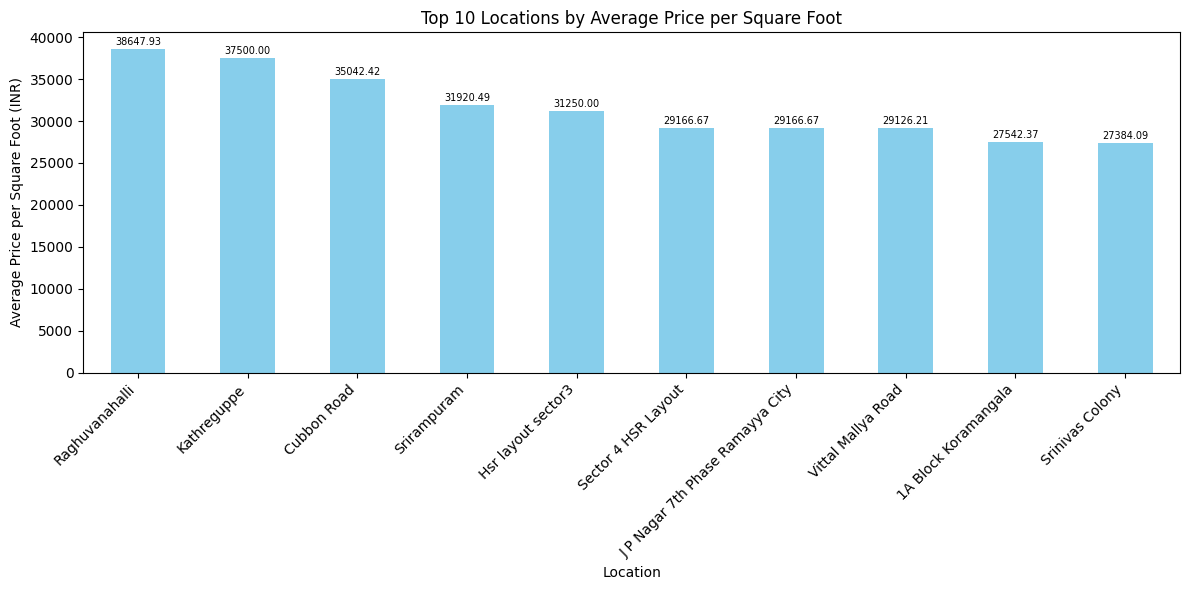

In [139]:
# Group by location and calculate mean price per square foot
location_price_per_sqft = df4.groupby('location')['price_per_sqft'].mean().sort_values(ascending=False).head(10)

# Plot the bar plot
plt.figure(figsize=(12, 6))
lb=location_price_per_sqft.plot(kind='bar', color='skyblue')
for p in lb.patches:
    lb.annotate(f'{p.get_height():.2f}',  # Display the height (value) with 2 decimal points
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the top-center of the bar
                ha='center', va='center', 
                fontsize=7, color='black', 
                xytext=(0, 5),  # Offset the label slightly above the bar
                textcoords='offset points')
plt.title("Top 10 Locations by Average Price per Square Foot")
plt.xlabel("Location")
plt.ylabel("Average Price per Square Foot (INR)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

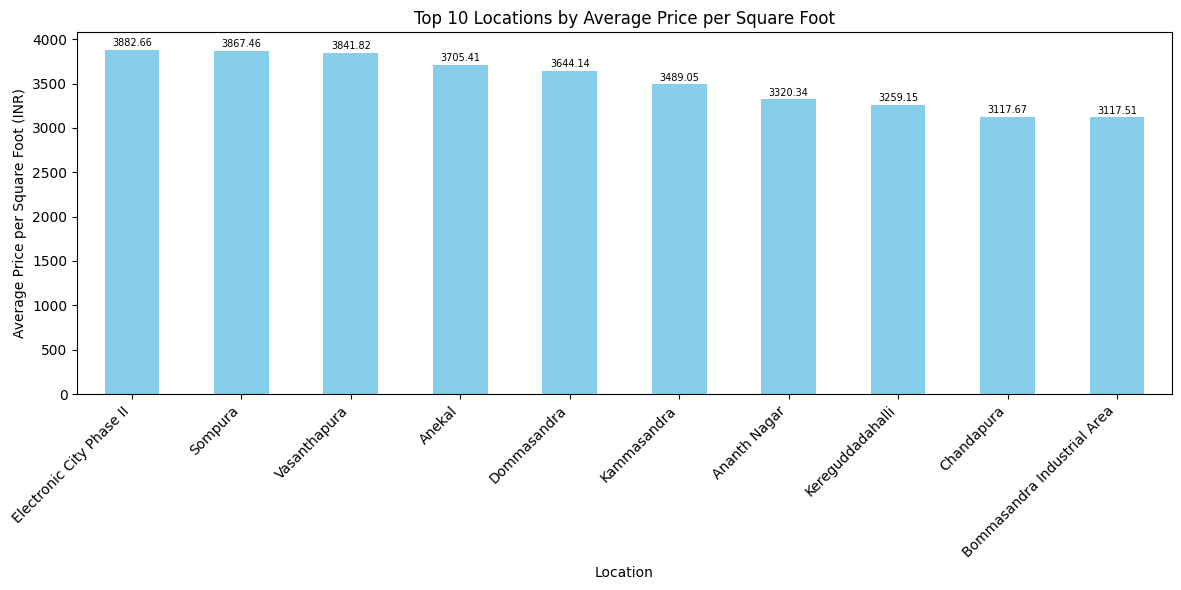

In [200]:
# Group by location and calculate mean price per square foot
location_price_per_sqft = df5.groupby('location')['price_per_sqft'].mean().sort_values(ascending=False).tail(10)

# Plot the bar plot
plt.figure(figsize=(12, 6))
lb=location_price_per_sqft.plot(kind='bar', color='skyblue')
for p in lb.patches:
    lb.annotate(f'{p.get_height():.2f}',  # Display the height (value) with 2 decimal points
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the top-center of the bar
                ha='center', va='center', 
                fontsize=7, color='black', 
                xytext=(0, 5),  # Offset the label slightly above the bar
                textcoords='offset points')
plt.title("Top 10 Locations by Average Price per Square Foot")
plt.xlabel("Location")
plt.ylabel("Average Price per Square Foot (INR)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

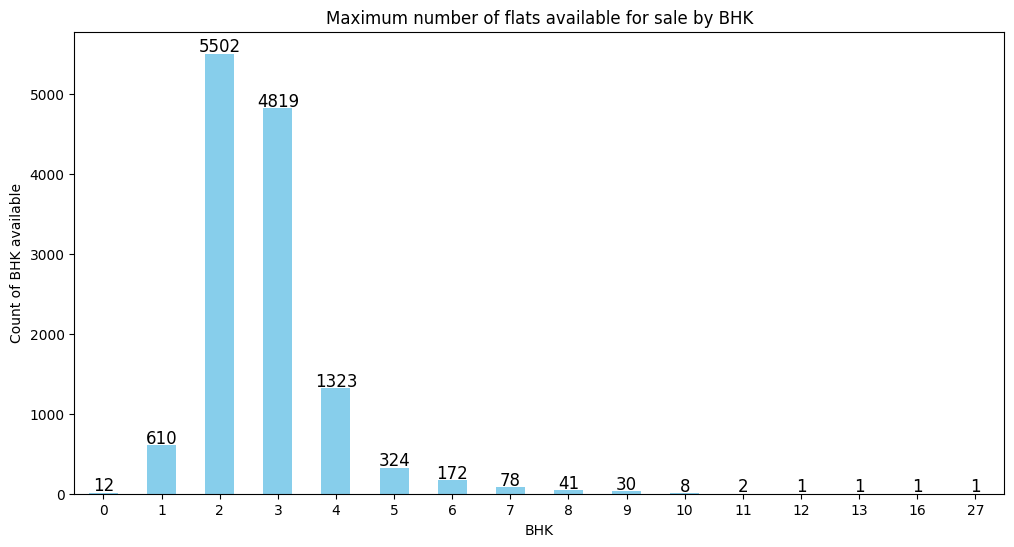

In [141]:
count = df4.groupby('rooms').size()  # Use .size() to get the count of rows for each BHK

# Plotting the bar chart
plt.figure(figsize=(12, 6))
ax = count.plot(kind='bar', color='skyblue')

# Adding data labels on top of each bar
for p in ax.patches:
    # p.get_height() gives the height of the bar (the count value)
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the top center of the bar
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5),  # offset the label a little above the bar
                textcoords='offset points')

# Customizing the plot
plt.title('Maximum number of flats available for sale by BHK')
plt.xlabel('BHK')
plt.ylabel('Count of BHK available')
plt.xticks(rotation=0)  # Keeps the BHK labels horizontal
plt.show()

Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [143]:
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4['location'].value_counts(ascending=False)
location_stats

location
Whitefield                        534
Sarjapur  Road                    391
Electronic City                   295
Kanakpura Road                    266
Thanisandra                       235
                                 ... 
Maruthi Extension                   1
Okalipura                           1
Vasantapura main road               1
1st Stage Radha Krishna Layout      1
Abshot Layout                       1
Name: count, Length: 1252, dtype: int64

In [144]:
location_stats.values.sum()

12925

In [145]:
len(location_stats[location_stats>10])

234

In [146]:
len(location_stats)

1252

In [147]:
len(location_stats[location_stats<=10])

1018

# Dimensionality Reduction

Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [148]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Dodsworth Layout                  10
1st Block Koramangala             10
Nagadevanahalli                   10
Basapura                          10
Dairy Circle                      10
                                  ..
Maruthi Extension                  1
Okalipura                          1
Vasantapura main road              1
1st Stage Radha Krishna Layout     1
Abshot Layout                      1
Name: count, Length: 1018, dtype: int64

In [150]:
len(df4.location.unique())

1252

In [151]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

235

In [152]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk,unit,area_sqft,rooms,price_per_sqft,min_size1,actual_minsize
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,,1056.0,2,3699.810606,474,592.5
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,,2600.0,4,4615.384615,722,722.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,,1440.0,3,4305.555556,598,657.8
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,,1521.0,3,6245.890861,598,747.5
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,,1200.0,2,4250.000000,474,592.5
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,,1170.0,2,3247.863248,474,592.5
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,,2732.0,4,7467.057101,722,902.5
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,,3300.0,4,18181.818182,722,902.5
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,,1310.0,3,4828.244275,598,747.5
9,other,6 Bedroom,1020.0,6.0,370.00,6,,1020.0,6,36274.509804,970,970.0


# Outlier Removal 

Outlier Removal Using Standard Deviation and Mean

In [154]:
df4.price_per_sqft.describe()

count     12735.000000
mean       6556.662849
std        4408.165413
min         267.829813
25%        4250.000000
50%        5399.449036
75%        7146.085079
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 176470, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [156]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df5 = remove_pps_outliers(df4)
df5.shape

(10569, 12)

Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

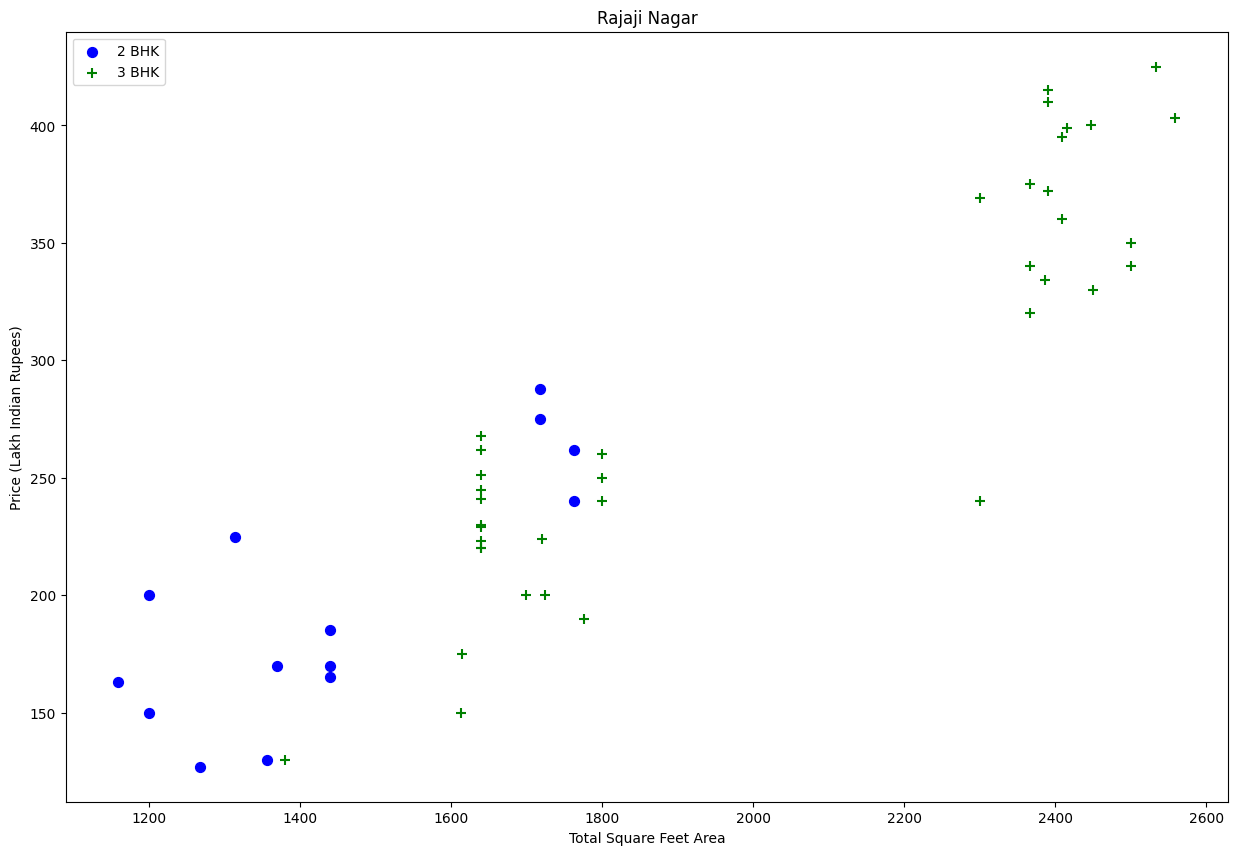

In [158]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Rajaji Nagar")

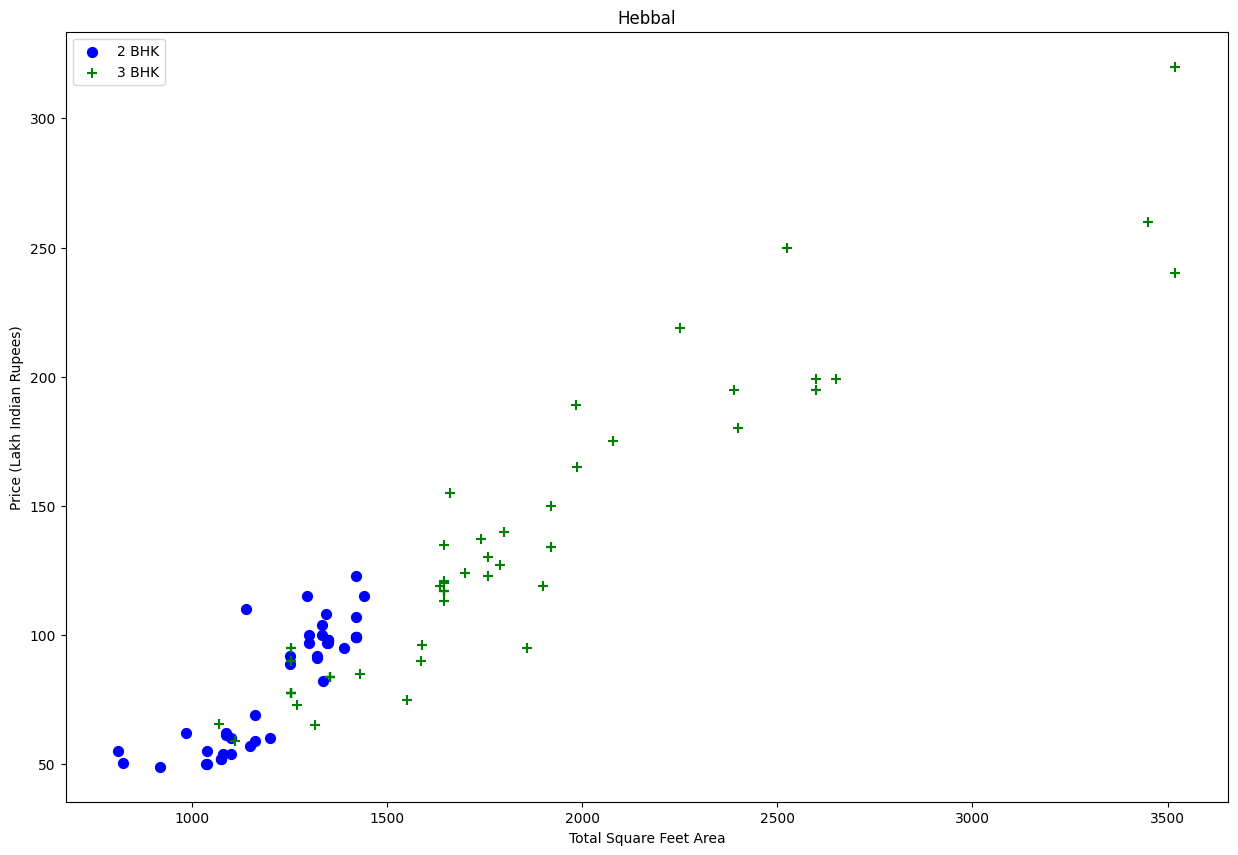

In [159]:
plot_scatter_chart(df5,"Hebbal")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{

    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
        
    },
    
}

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [160]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_bhk_outliers(df5)
# df8 = df7.copy()
df6.shape

(7474, 12)

Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

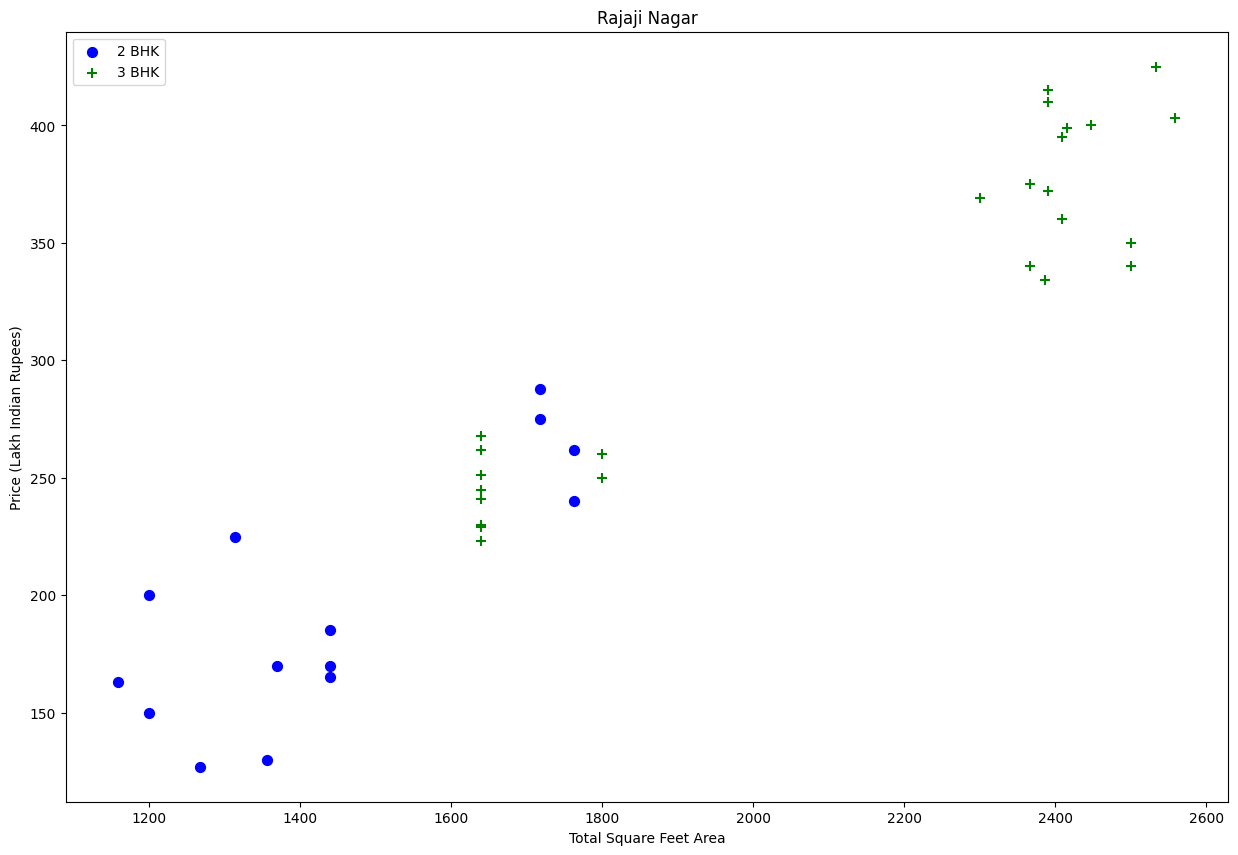

In [162]:
plot_scatter_chart(df6,"Rajaji Nagar")

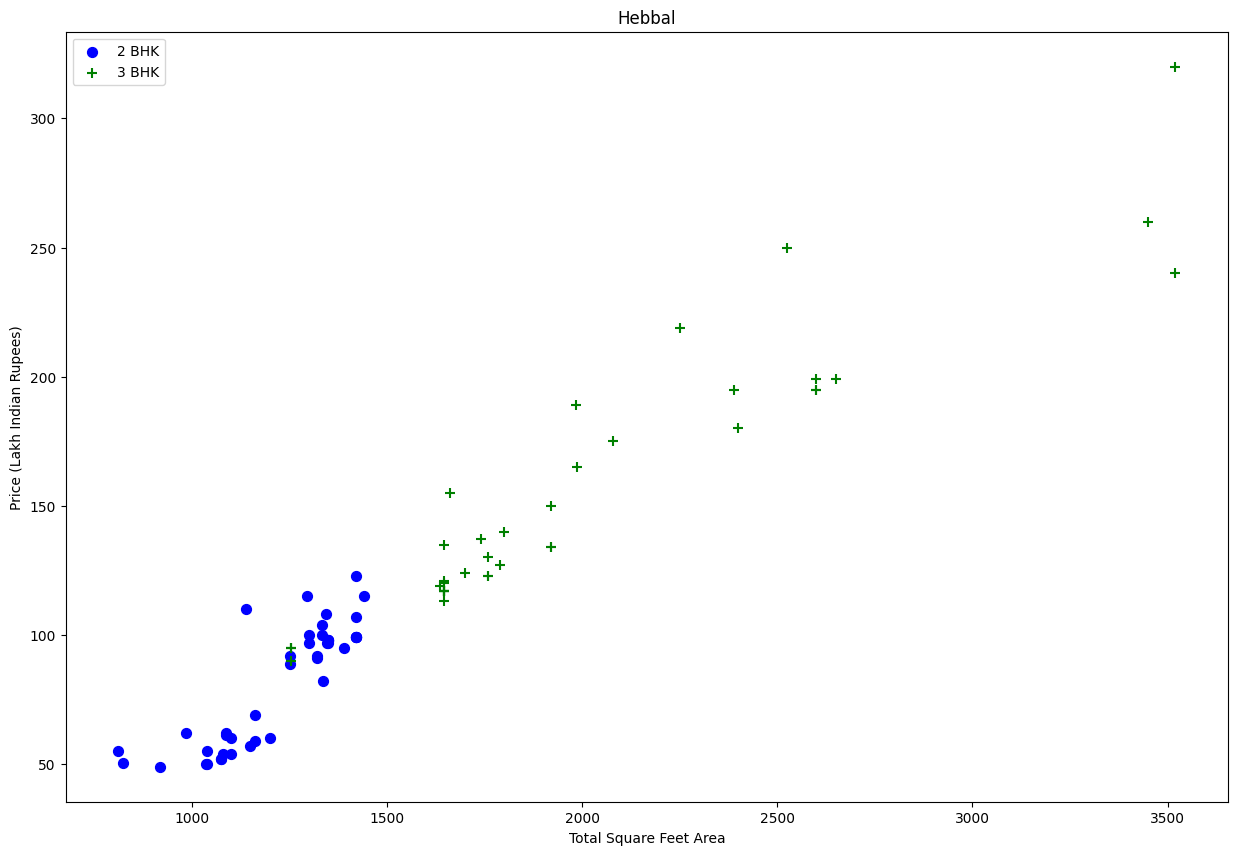

In [163]:
plot_scatter_chart(df6,"Hebbal")

Based on above charts we can see that data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers function

Text(0, 0.5, 'Count')

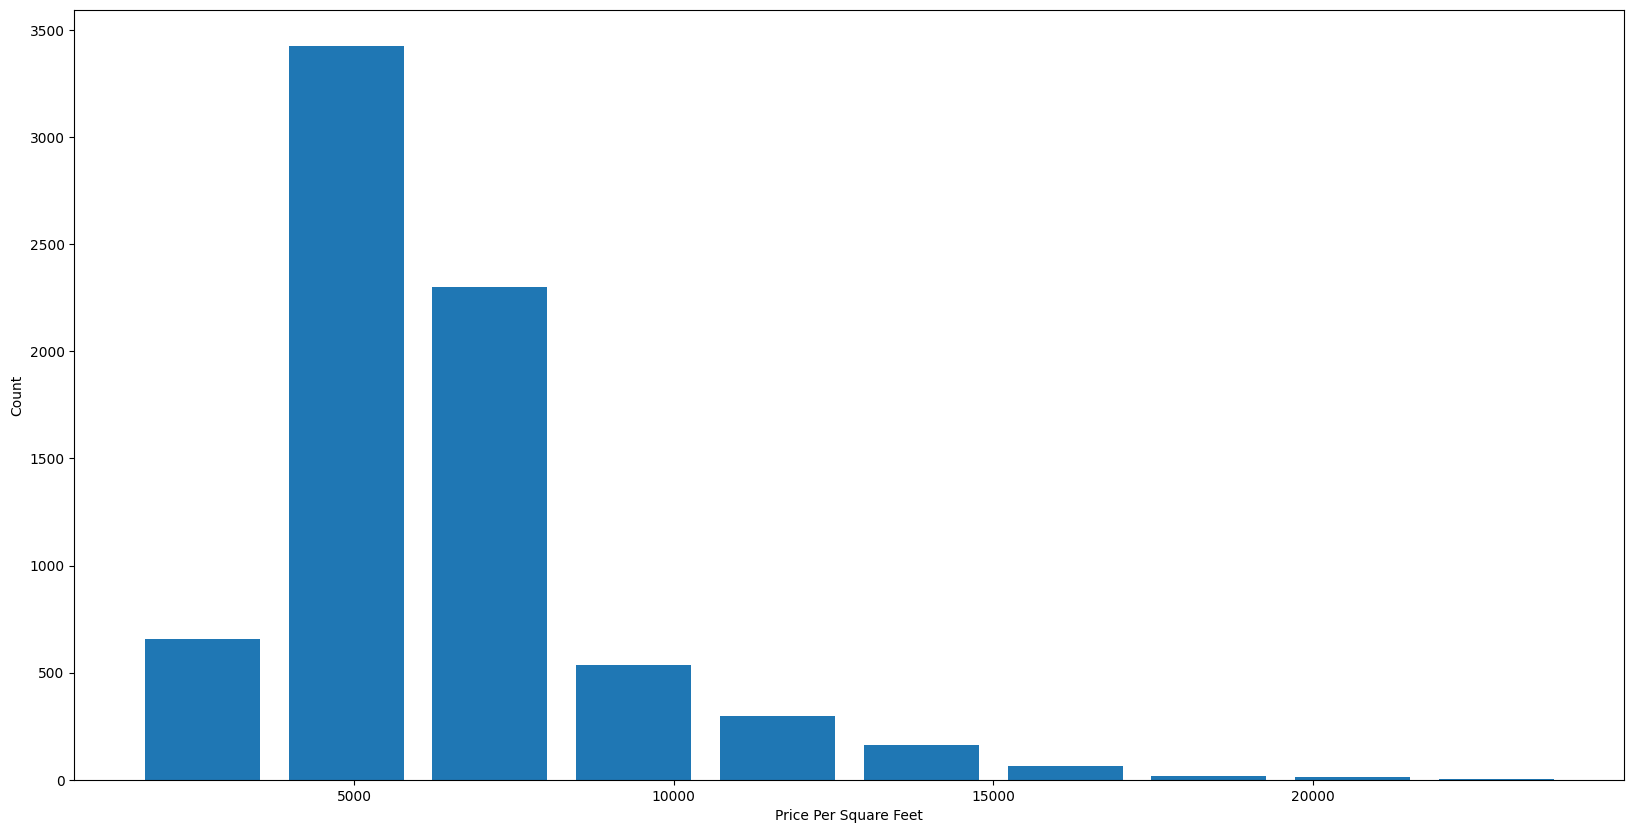

In [165]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [166]:
df6.head()

,location,size,total_sqft,bath,price,bhk,unit,area_sqft,rooms,price_per_sqft,min_size1,actual_minsize
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,,2850.0,4,15017.543860,722,902.5
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,,1630.0,3,11901.840491,598,747.5
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,,1875.0,3,12533.333333,598,747.5
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,,1200.0,3,10833.333333,598,657.8
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,,1235.0,2,11983.805668,474,592.5


In [178]:
df7 = df6.drop(['size','price_per_sqft','area_sqft','min_size1','actual_minsize','unit'],axis='columns')
df6.head(3)

,location,size,total_sqft,bath,price,bhk,unit,area_sqft,rooms,price_per_sqft,min_size1,actual_minsize
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,,2850.0,4,15017.543860,722,902.5
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,,1630.0,3,11901.840491,598,747.5
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,,1875.0,3,12533.333333,598,747.5


# Use One Hot Encoding For Location

In [179]:
dummies = pd.get_dummies(df7.location,dtype=int)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
df8 = pd.concat([df7,dummies.drop('other',axis='columns')],axis='columns')
df8.head()

,location,total_sqft,bath,price,bhk,rooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
df9 = df8.drop('location',axis='columns')
df9.head(2)

,total_sqft,bath,price,bhk,rooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
X = df9.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,rooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
y = df9.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [185]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8024117671852795

Use K Fold cross validation to measure accuracy of our LinearRegression model

In [186]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82490546, 0.8552677 , 0.80717526, 0.77790302, 0.85054634])

# Find best model using GridSearchCV


In [187]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'copy_X': [True, False],
                'fit_intercept':[True, False],
                'positive':[True,False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\HP\anaconda3\envs\py310\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\envs\py310\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\envs\py310\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\anaconda3\envs\py310\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HP

,model,best_score,best_params
0,linear_regression,0.823586,"{'copy_X': True, 'fit_intercept': False, 'posi..."
1,lasso,0.689142,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.646742,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

# Test the model for few properties

In [188]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [189]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\HP\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


101.54207939532297

In [190]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Users\HP\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


112.64172399310931

In [191]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Users\HP\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


207.5688885807632

In [192]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\HP\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


218.66853317854958

# Export the tested model to a pickle file

In [193]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

# Export location and column information to a file that will be useful later on in our prediction application


In [194]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))